# Imports

In [127]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from numpy.random import seed
seed(888)
tf.random.set_seed(404)

# Constants

In [119]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird','Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT * IMAGE_WIDTH
COLOUR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOUR_CHANNELS
NR_CLASSES = len(LABEL_NAMES)

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)
type(x_train_all)

numpy.ndarray

# Explore the Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

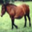

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
y_train_all[7][0]

7

In [10]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

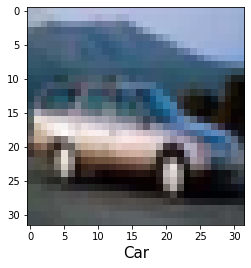

In [11]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]],fontsize=15)
plt.show()

**Challenge:** Write a for loop to display the first 10 images from the x_train_all array in a row. Show the name of the label below the picture. Remove the ugly tick marks. Hint use matplotlib.

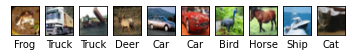

In [12]:
# My solution
i = 0 
images_num = 10
for picture in x_train_all[0:images_num]:
    plt.subplot(1,images_num,i+1)
    plt.imshow(picture) # Could of replaced picture with x_train_all[i]
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]],fontsize=10)
    plt.xticks([], [])
    plt.yticks([], [])
    i = i + 1

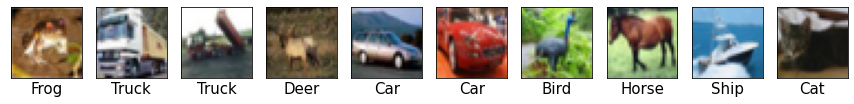

In [13]:
# Course solution
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]],fontsize=15)
    plt.imshow(x_train_all[i])

In [14]:
x_train_all[0].shape

(32, 32, 3)

In [15]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [16]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [17]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [18]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [19]:
type(x_train_all[0][0][0][0])

numpy.float64

In [20]:
x_train_all[0][0][0][0]

0.23137254901960785

In [21]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [22]:
x_train_all.shape

(50000, 3072)

In [23]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [24]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays x_train and y_train that have the shape (40000,3072) and (40000,1) respectively. They need to contain the last 40000 values from x_train_all and y_train_all respectively.

In [25]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

###  Create a small dataset ( for illustration)

In [26]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [51]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [52]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu',name='m2_hidden1'))
model_2.add(Dense(64, activation='relu',name='m2_hidden2'))
model_2.add(Dense(16, activation='relu',name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax',name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

**Challenge:** Create a third model, model_3 that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%

In [53]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu',name='m2_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu',name='m2_hidden2'))
model_3.add(Dense(16, activation='relu',name='m2_hidden3'))
model_3.add(Dense(10, activation='softmax',name='m2_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [28]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
(32*32*3*128 + 128) + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

# Tensorboard (visualising learning)

In [31]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model 

In [35]:
samples_per_batch = 1000

In [43]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs
            ,callbacks=[get_tensorboard('Model_1')], verbose=0, validation_data=(x_val,y_val))

Successfully created directory
Wall time: 19.5 s


In [46]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs
            ,callbacks=[get_tensorboard('Model_2')], verbose=0, validation_data=(x_val,y_val))

Successfully created directory
Wall time: 24.4 s


In [54]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs
            ,callbacks=[get_tensorboard('Model_1 XL')], verbose=0, validation_data=(x_val,y_val))

Successfully created directory
Wall time: 1min 16s


In [55]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs
            ,callbacks=[get_tensorboard('Model_2 XL')], verbose=0, validation_data=(x_val,y_val))

Successfully created directory
Wall time: 3min 18s


In [56]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs
            ,callbacks=[get_tensorboard('Model_3 XL')], verbose=0, validation_data=(x_val,y_val))

Successfully created directory
Wall time: 3min 30s


# Predictions on Individual Images

In [59]:
x_val[0].shape

(3072,)

In [66]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [71]:
np.set_printoptions(precision=3)

In [72]:
model_2.predict(test)

array([[0.063, 0.004, 0.047, 0.147, 0.117, 0.267, 0.301, 0.051, 0.001,
        0.001]], dtype=float32)

In [74]:
model_2.predict(x_val).shape

(10000, 10)

In [75]:
model_2.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([6], dtype=int64)

In [76]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset.

In [101]:
Corr = 0
for i in range(10):
    test_img = model_2.predict_classes(np.expand_dims(x_val[i], axis=0))
    print(f'Predicted class is {test_img}')
    print(f'Actual class is {y_val[i]} \n')
    if test_img == y_val[i]:
        Corr = Corr + 1
print(f'Number correct is: {Corr}')

Predicted class is [6]
Actual class is [6] 

Predicted class is [1]
Actual class is [9] 

Predicted class is [9]
Actual class is [9] 

Predicted class is [4]
Actual class is [4] 

Predicted class is [1]
Actual class is [1] 

Predicted class is [3]
Actual class is [1] 

Predicted class is [2]
Actual class is [2] 

Predicted class is [7]
Actual class is [7] 

Predicted class is [8]
Actual class is [8] 

Predicted class is [9]
Actual class is [3] 

Number correct is: 7


# Evaluation 

In [102]:
model_2.metrics_names

['loss', 'accuracy']

In [106]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
# print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 0s 1ms/step - loss: 1.4231 - accuracy: 0.4897


## Confusion Matrix

In [109]:
predictions =  model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [111]:
conf_matrix.shape

(10, 10)

In [112]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [113]:
conf_matrix.max()

712

In [128]:
conf_matrix.min()

8

In [130]:
conf_matrix[0]

array([580,  25,  76,  22,  29,  20,  17,  24, 180,  27], dtype=int64)

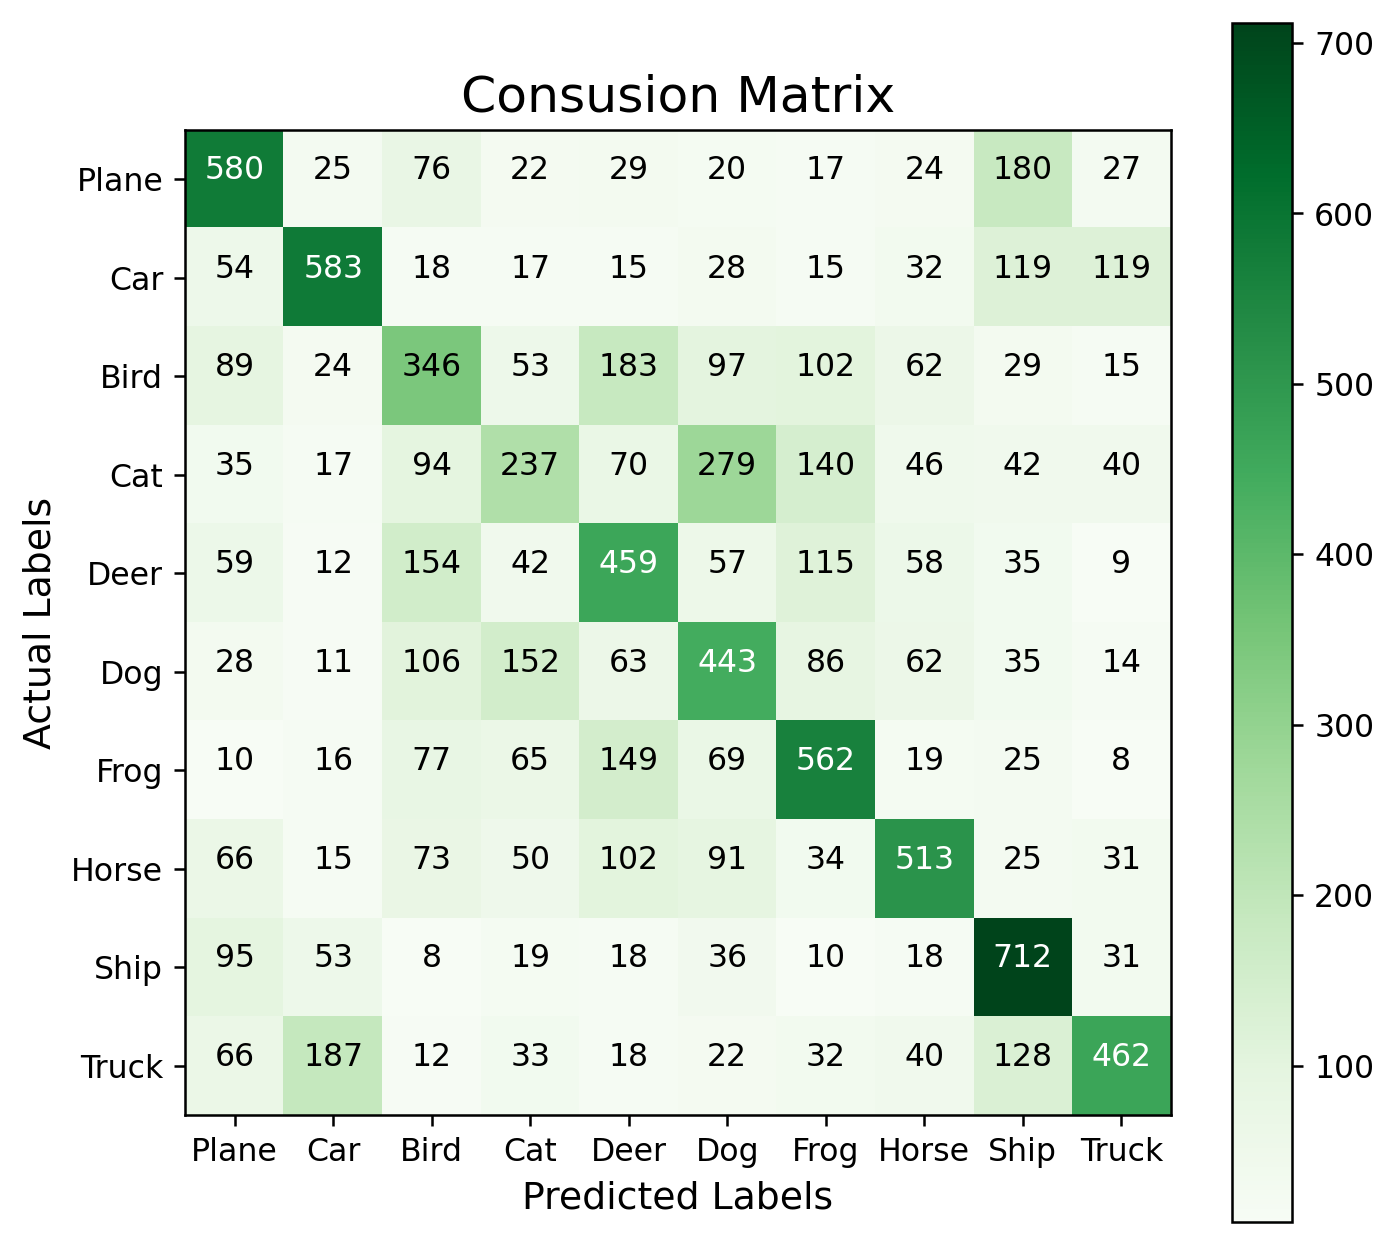

In [137]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Consusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i,j] > conf_matrix.max()/2 else 'black')

plt.show()

**Challenge:** What do the numbers down the diagonal represent? What do the other numbers (excluding the numbers in the diagonal) in a single row represent? Try to identify the false positives, false negatives, and the true positives in the confusion matrix.

Diagonals reprecent the true positives. 

The other values in the row reprecent the false negatives.

The other values in the column reprecent the false positives.

In [140]:
# True Positives
np.diag(conf_matrix)

array([580, 583, 346, 237, 459, 443, 562, 513, 712, 462], dtype=int64)

In [141]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.58 , 0.583, 0.346, 0.237, 0.459, 0.443, 0.562, 0.513, 0.712,
       0.462])

In [142]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.536, 0.618, 0.359, 0.343, 0.415, 0.388, 0.505, 0.587, 0.535,
       0.611])

In [144]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:0.2%}')

Model 2 recall score is 48.97%


**Challenge:** Calculate the avergae precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole.

In [151]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:0.2%}')

f_score = (2 * avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f-score score is {f_score:0.2%}')

Model 2 precision score is 48.98%
Model 2 f-score score is 48.97%
